## Desafío - Gráficos y correlación

**Mi nombre:** Julio Valdés
 
**Prefesor:** Gabriel Tamayo

**Generación:** G5




* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

 ### 1 - Importar librerías y .csv
 
 * Importe las librerías básicas para el análisis de datos
 * Descarge e importe el archivo nations.csv. **Warning: va a encontrar un error en el formato (códificación del archivo es "ISO-8859-1") ¿Cómo lo podemos solucionar?.**
 
La base de datos contiene información a nivel mundial sobre demografía:

* country : País.
* region : Continente del país.
* gdp : Producto Interno Bruto per cápita, precios 2005.
* school : Promedio años de escolaridad.
* adfert : Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
* chldmort : Probabilidad de muerte antes de los 5 años por cada 1000.
* life : Esperanza de vida al nacer.
* pop : Población total.
* urban : Porcentaje de población urbana.
* femlab : Tasa entre hombres y mujeres en el mercado laboral.
* literacy : Tasa de alfabetismo.
* co2 : Toneladas de Co2 mitidas per cápita.
* gini : Coeficiente de desigualdad del ingreso.
* Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life .
* Apellidos desde la N hasta la Z: Enfocarse en las variables femlab , literacy y school .

In [70]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn') # gráficos estilo seaborn
#plt.rcParams["figure.figsize"] = (15,6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

df = pd.read_csv('nations.csv', encoding='ISO-8859-1')
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


### Lo podemos solucionar agregando el encoding ISO-8859-1 al metodo read_csv

 ### 2 - Refactorización de gráficos matplotlib a seaborn
 
 A continuación se presenta una serie de gráficos construídos con matplotlib . Se le pide refactorizarlos utilizando seaborn. Para ellos se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.
 

## A

``` python
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
    
binarize_histogram(df, 'adfert')

```

**Resultado Mínimo esperado**

![imagen_logo](images/resultado_esperado1.png)

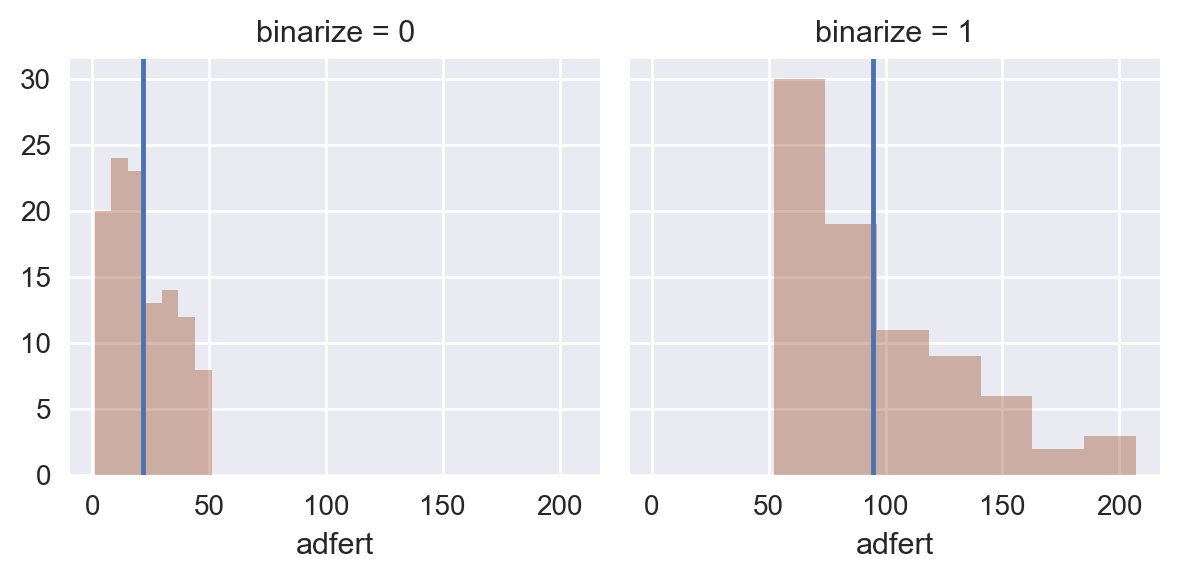

In [67]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    grid = sns.FacetGrid(df, col="binarize", col_wrap=2)
    grid = grid.map(sns.distplot, variable, color='sienna', kde=False)
    axes = grid.axes.flatten()
    axes[0].axvline(np.mean(hist_0))
    axes[1].axvline(np.mean(hist_1))
    
binarize_histogram(df, 'adfert')

## B

``` python
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
grouped_boxplot(df, 'adfert', 'region')
```


**Resultado Mínimo esperado**

![imagen_logo](images/resultado_esperado2.png)

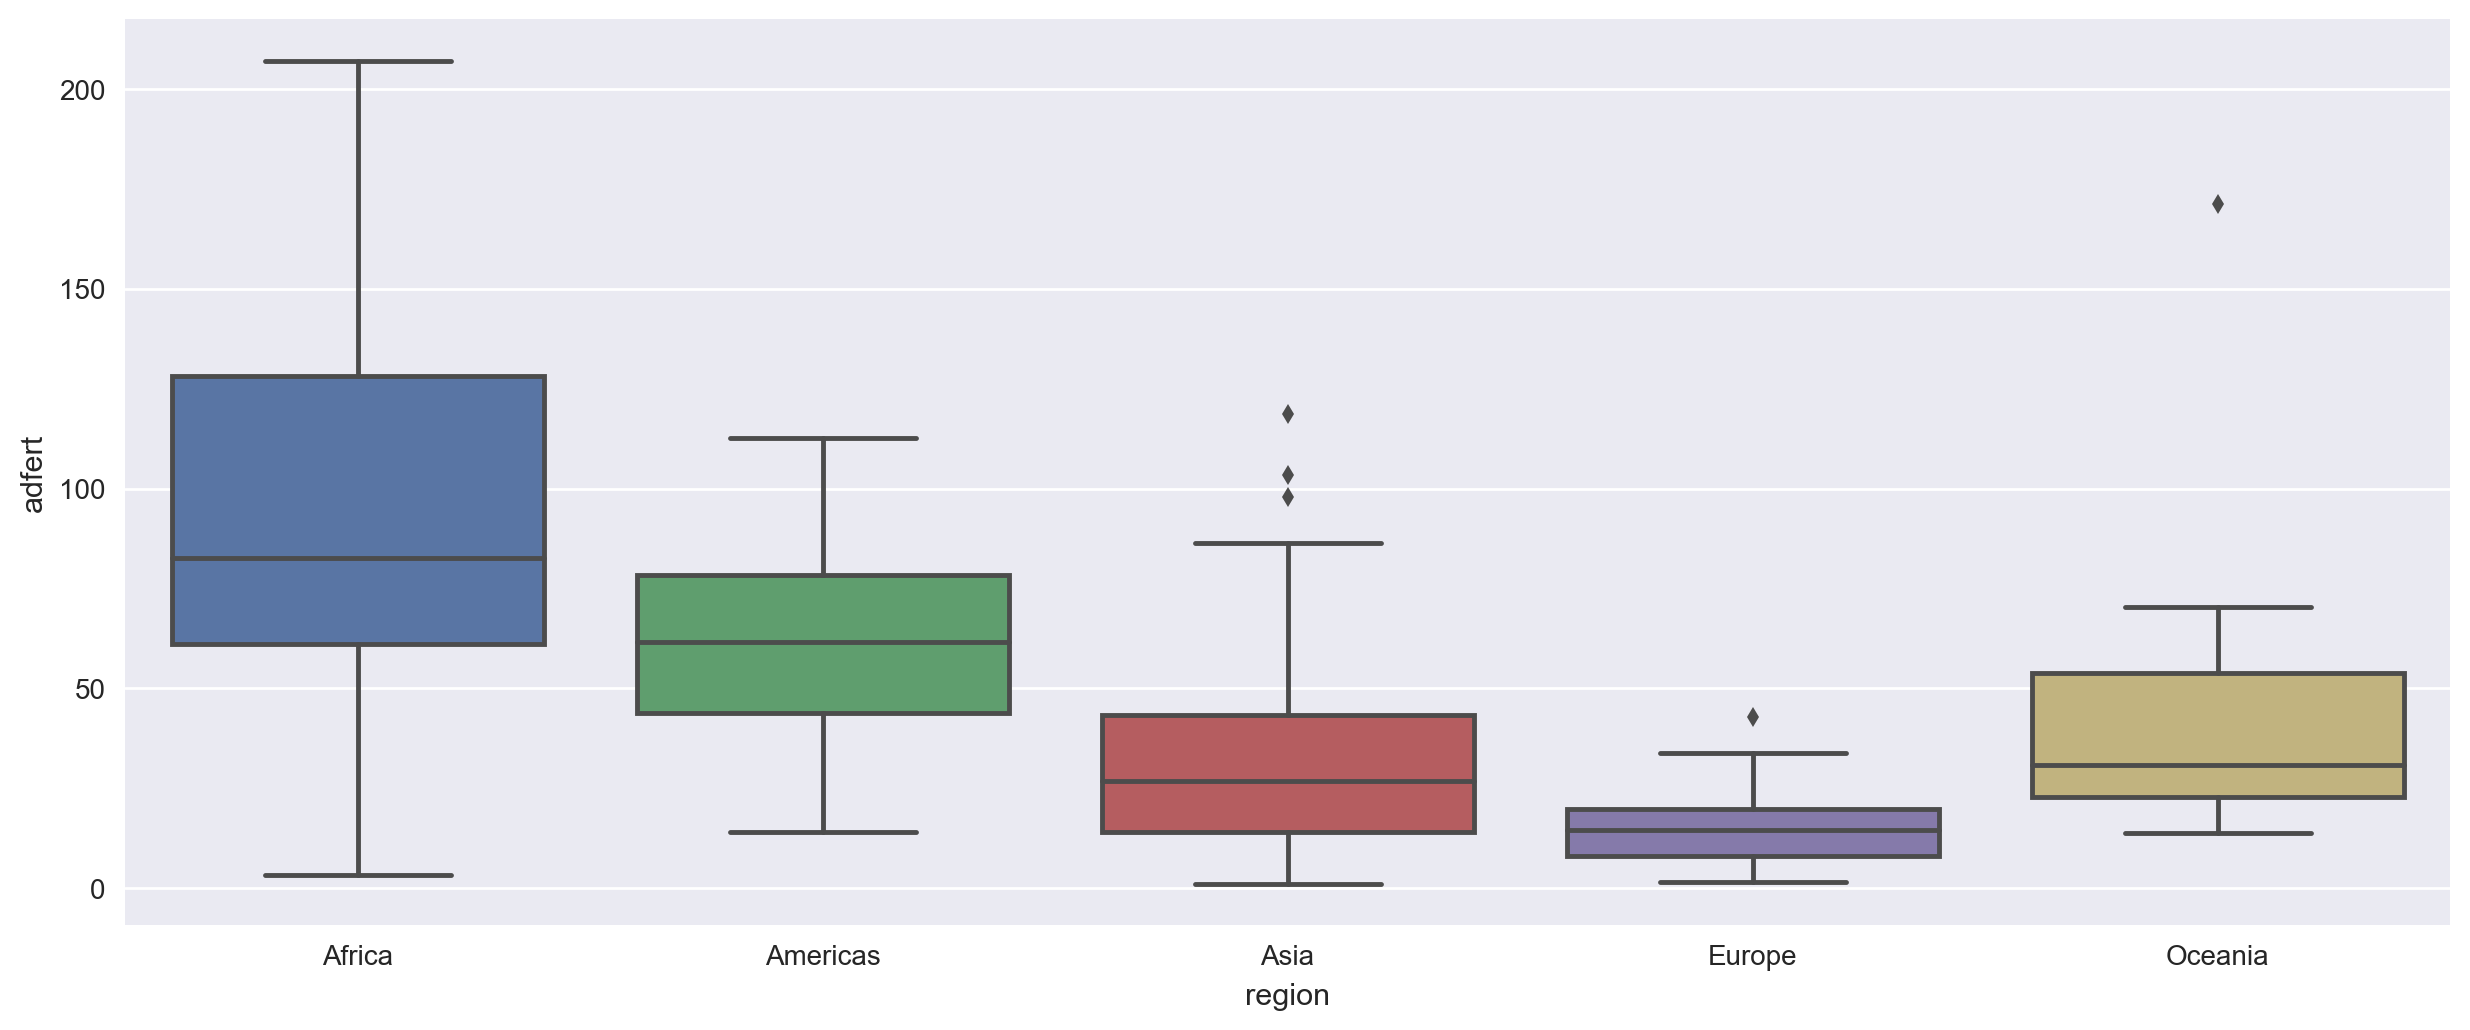

In [68]:
def grouped_boxplot(dataframe, variable, group_by):
    ax = sns.boxplot(x=group_by, y=variable, data=dataframe)

grouped_boxplot(df, 'adfert', 'region')

## C

``` python
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
        
grouped_scatterplot(df, 'school', 'adfert', 'region')
```


**Resultado Mínimo esperado**

![imagen_logo](images/resultado_esperado3.png)

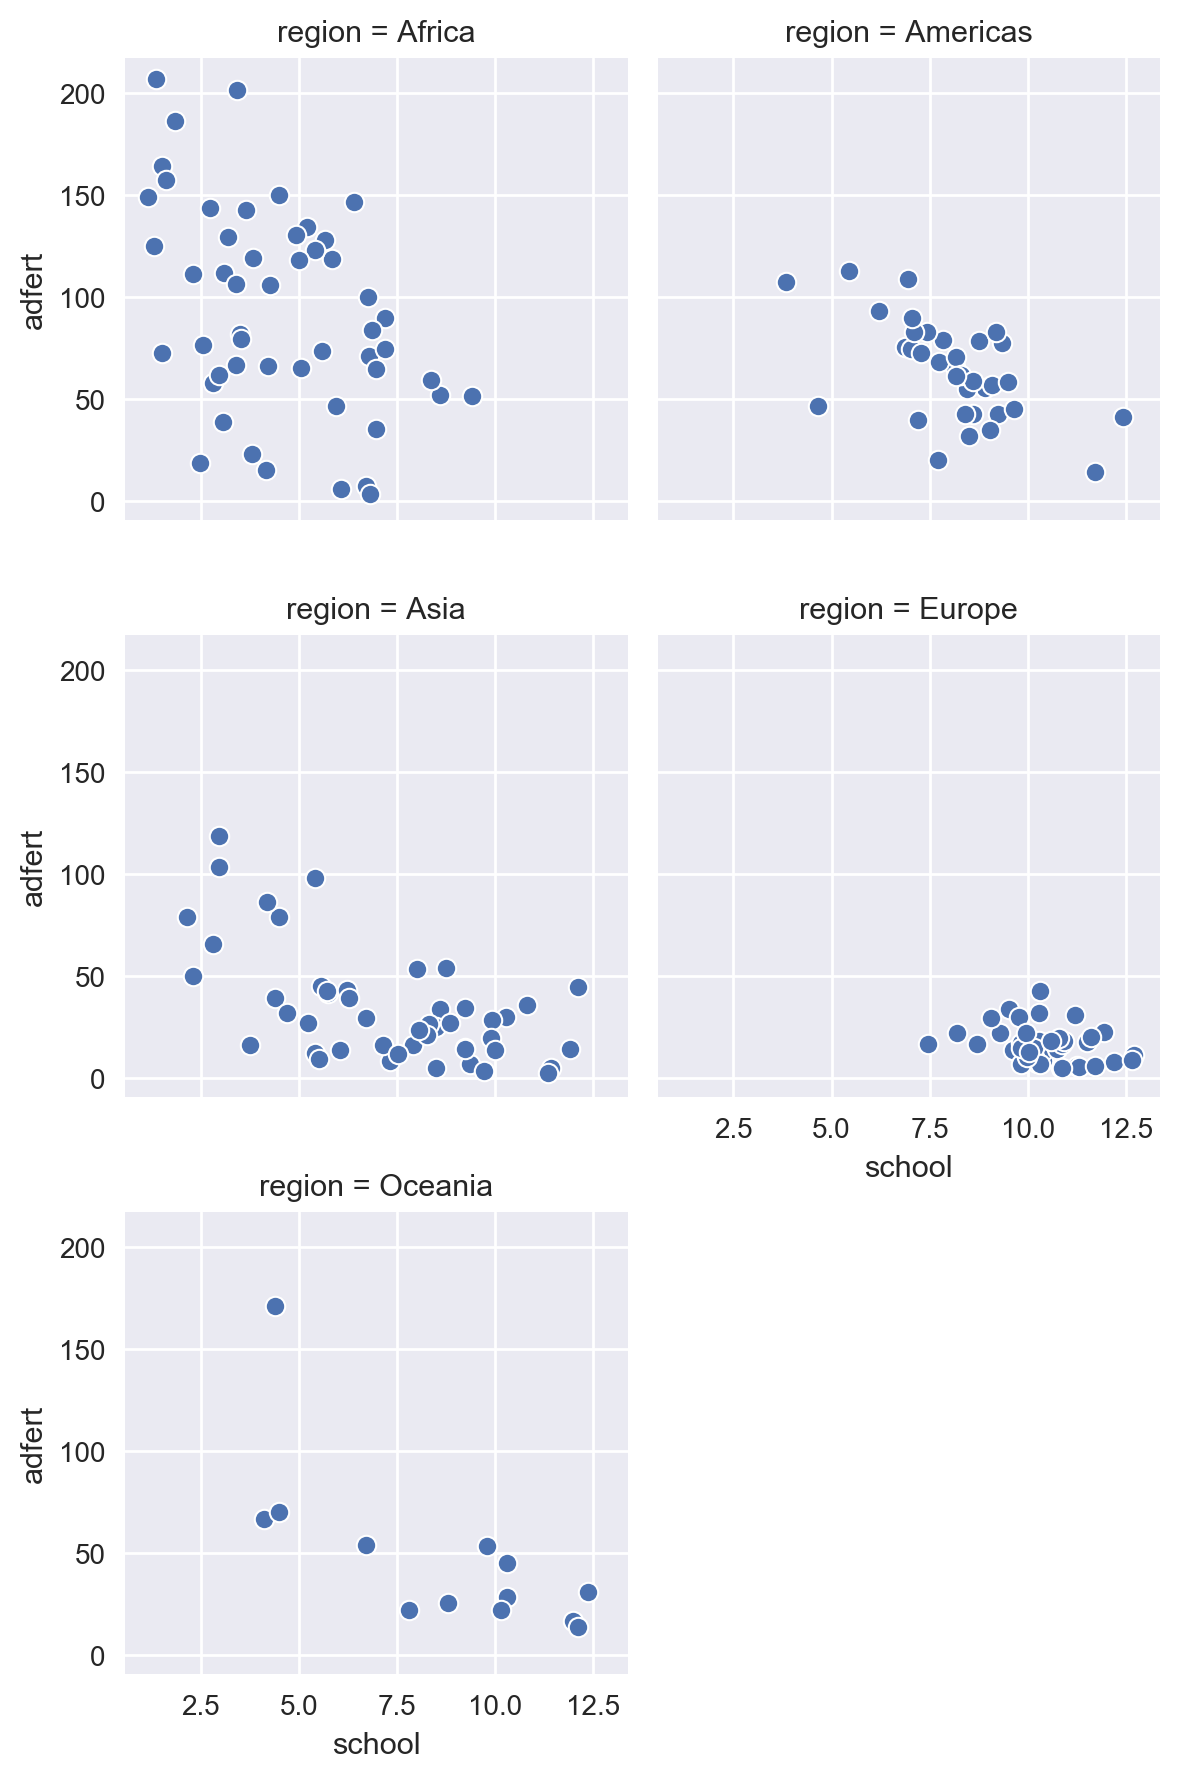

In [81]:
def grouped_scatterplot2(dataframe, x, y, group_by):
    grid = sns.FacetGrid(dataframe, col=group_by, col_wrap=2)
    grid = grid.map(sns.scatterplot, x, y)
    
grouped_scatterplot2(df, 'school', 'adfert', 'region')

## 3. Genere un heatmap entre todas las variables.
En base a las variables de interés asignadas, comente cuáles son las principales
correlaciones existentes, tomando como criterio de corte aquellas superior a .6

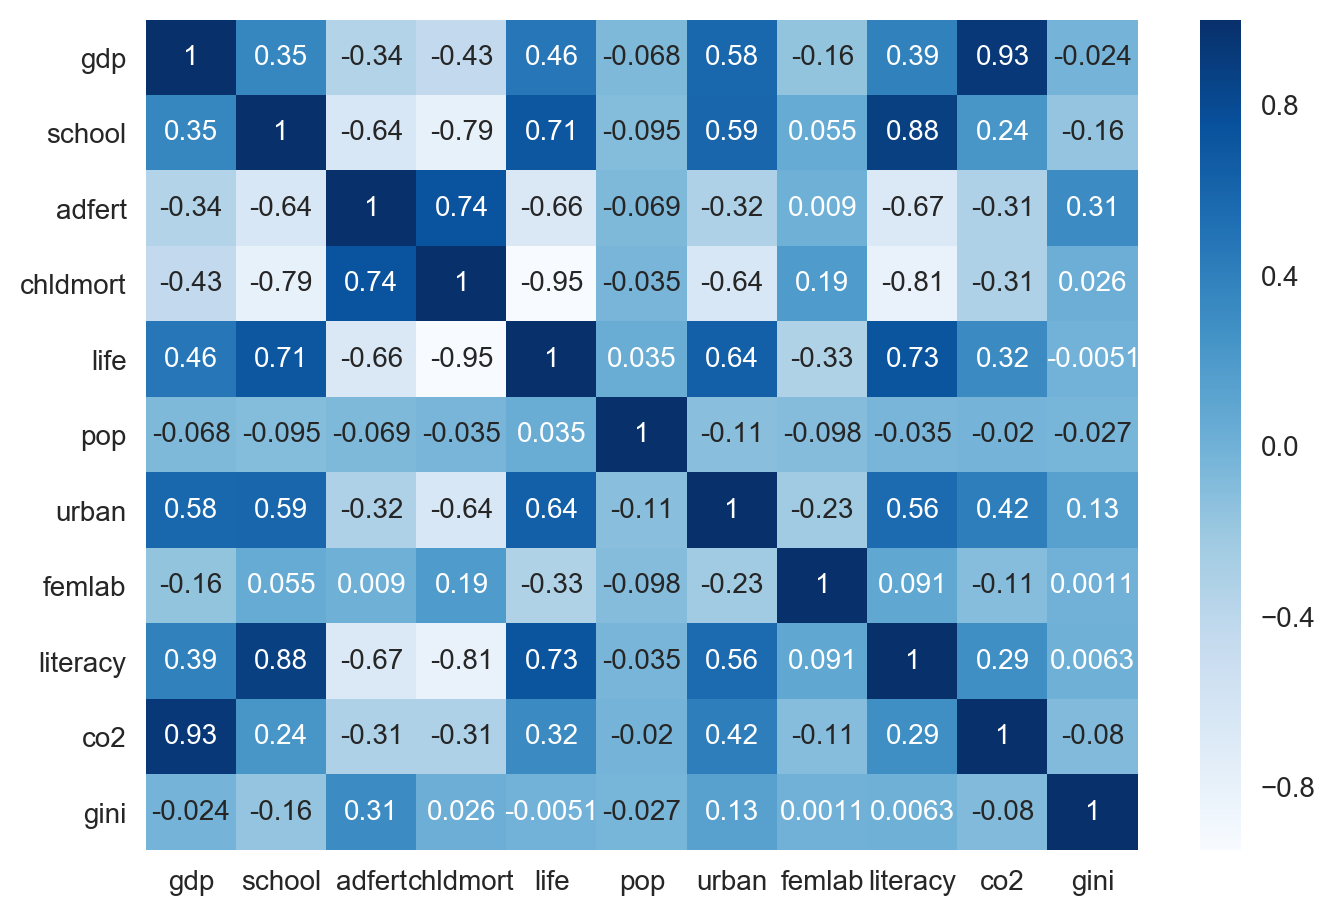

In [130]:
df_subset = df.loc[:, 'gdp':'gini']
corr_mat = df_subset.dropna().corr()
sns.heatmap(corr_mat, cmap='Blues', annot=True)

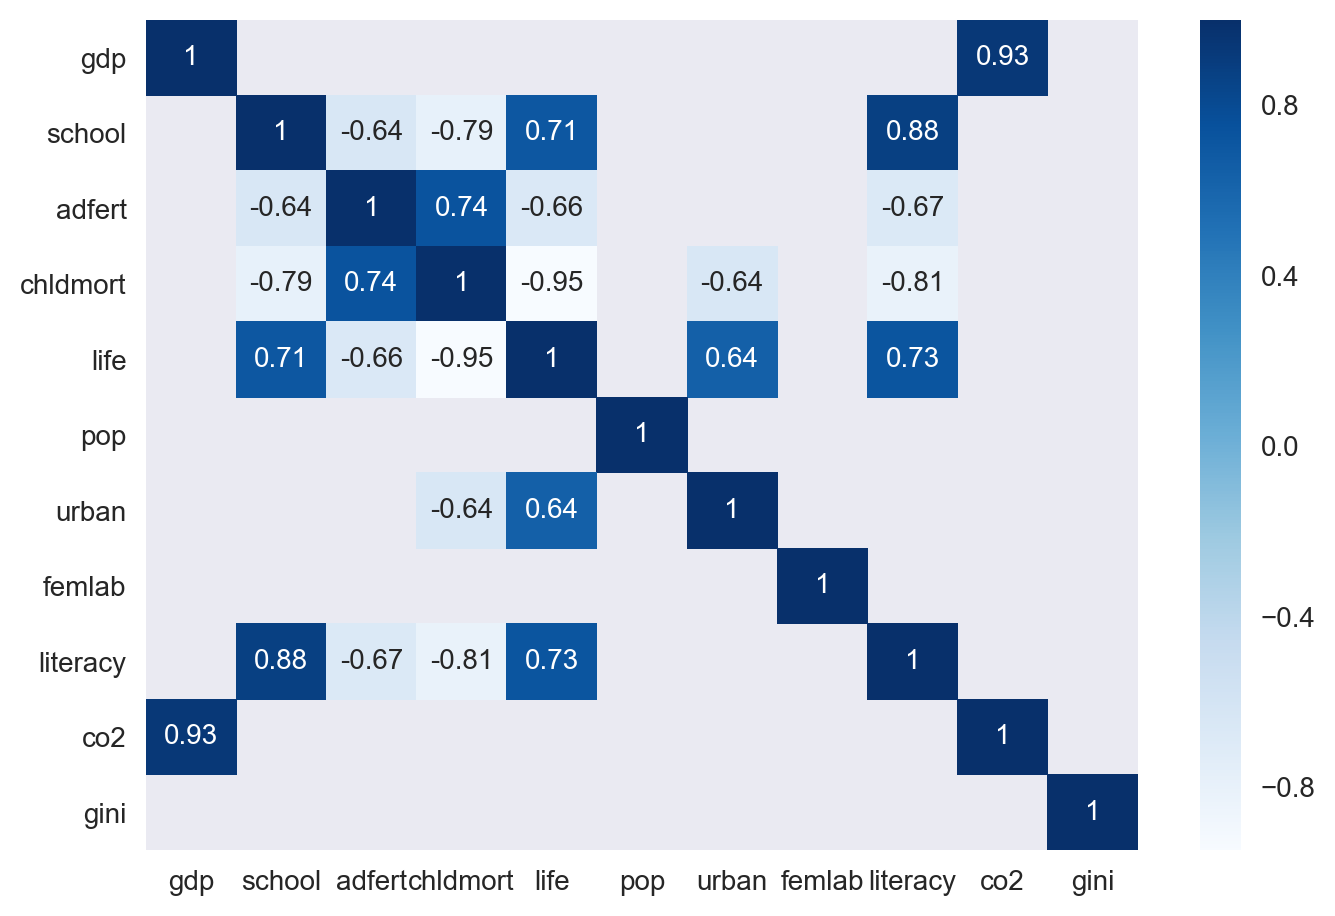

In [131]:
sns.heatmap(corr_mat[abs(corr_mat) > 0.6], cmap='Blues', annot=True)

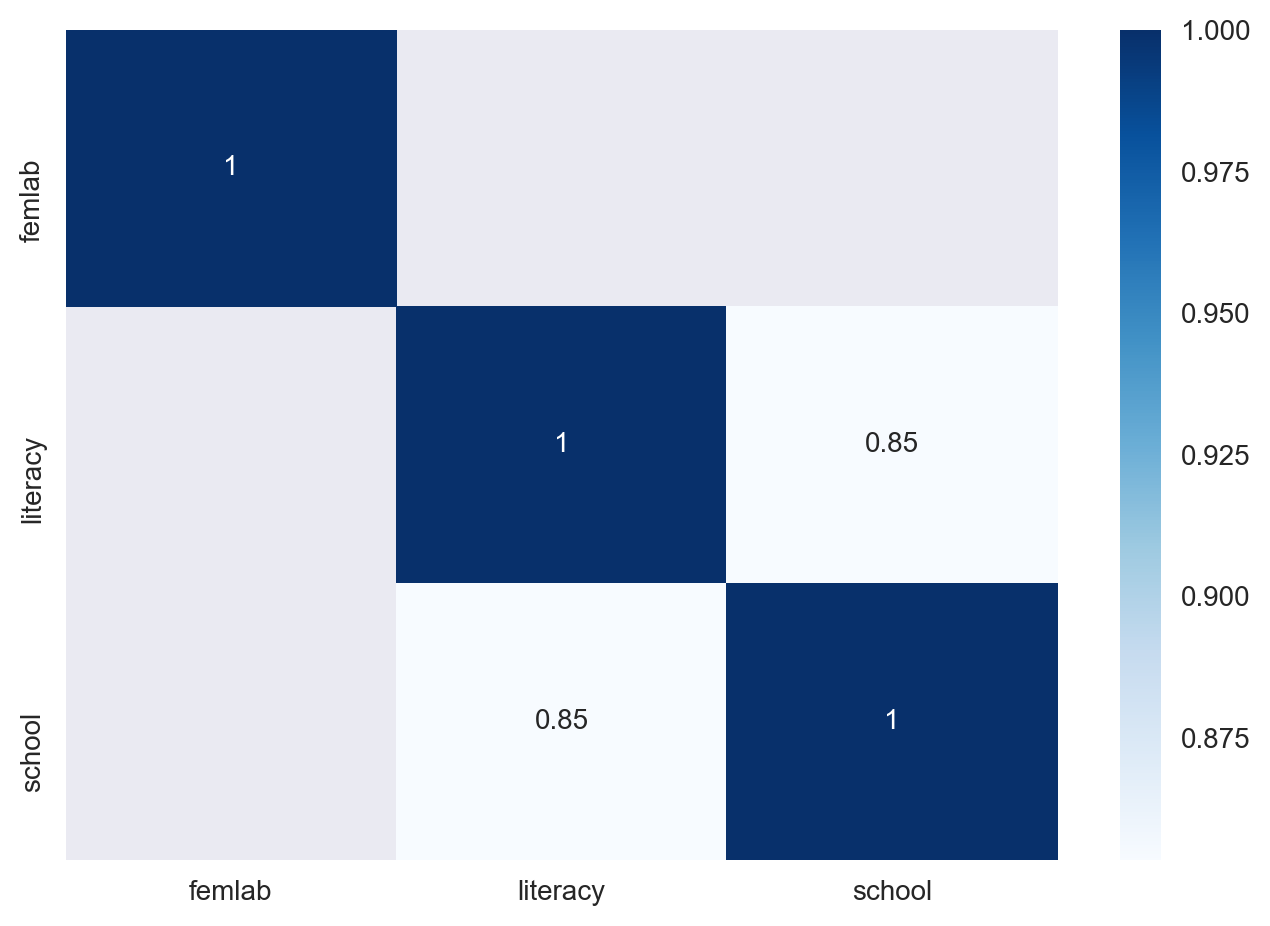

In [133]:
df_subset_analisis = df.loc[:, ['femlab', 'literacy', 'school']]
corr_mat_analisis = df_subset_analisis.dropna().corr()
sns.heatmap(corr_mat_analisis[abs(corr_mat_analisis) > 0.6], cmap='Blues', annot=True)

### Existe una correlación directamente proporcional entre el promedio de años de escolaridad y la tasa de alfabetismo

## 4. En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones

* tip: Genere una nueva tabla segmentando con la siguiente sintáxis: tmp = df.loc[:,
['variables', 'a', 'agregar']] . No olvide agregar la variable region .
* tip: Genere un loop para recorrer cada región y generar un heatmap.
* Comente brevemente las principales correlaciones a través de las regiones.

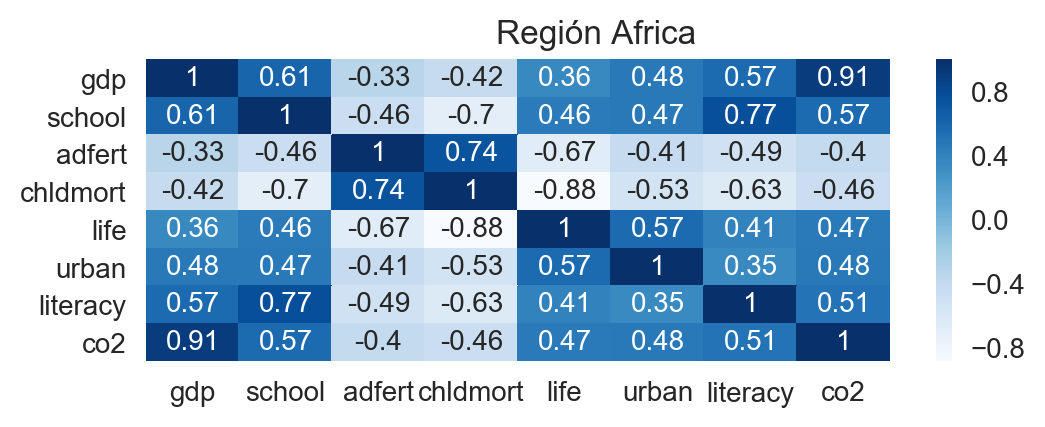

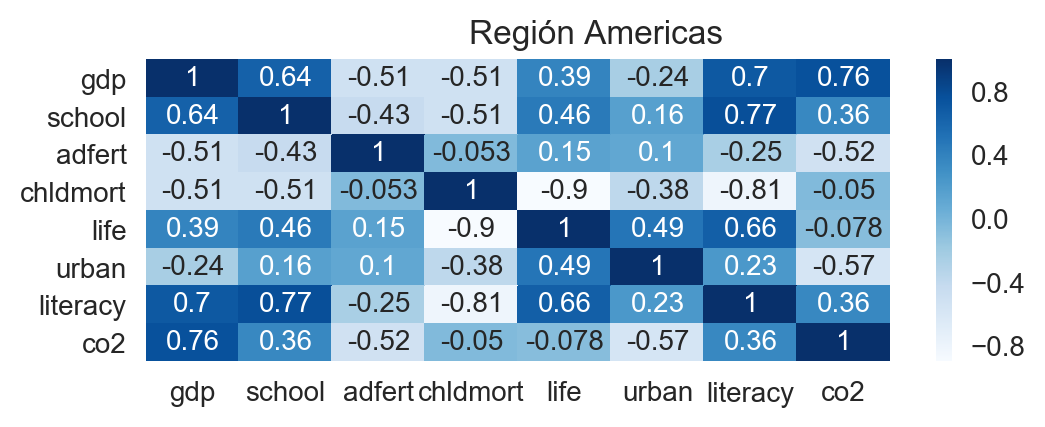

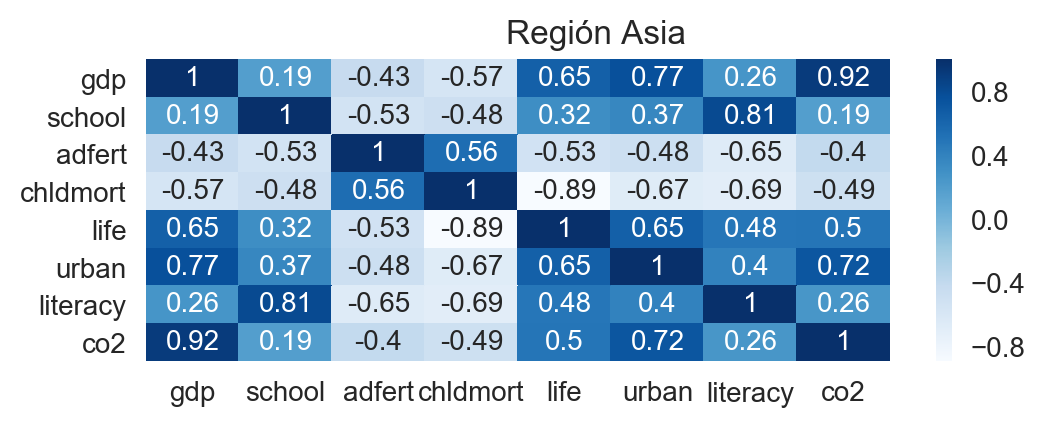

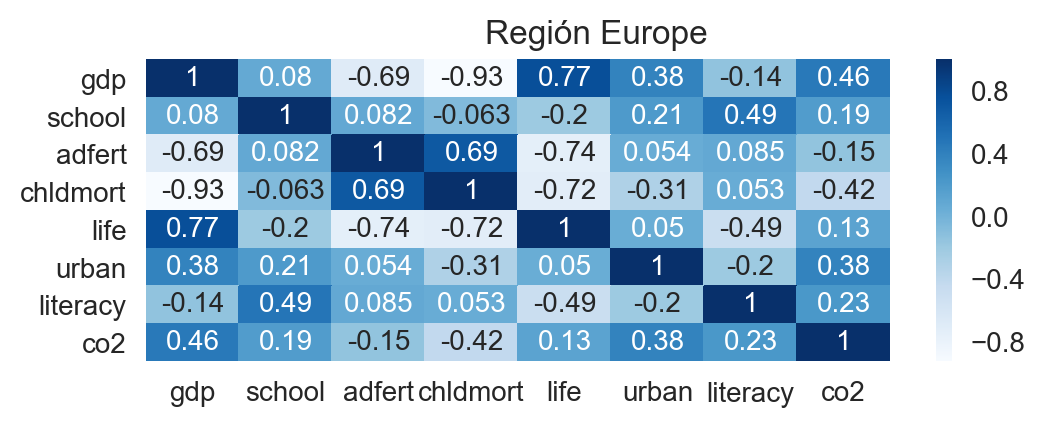

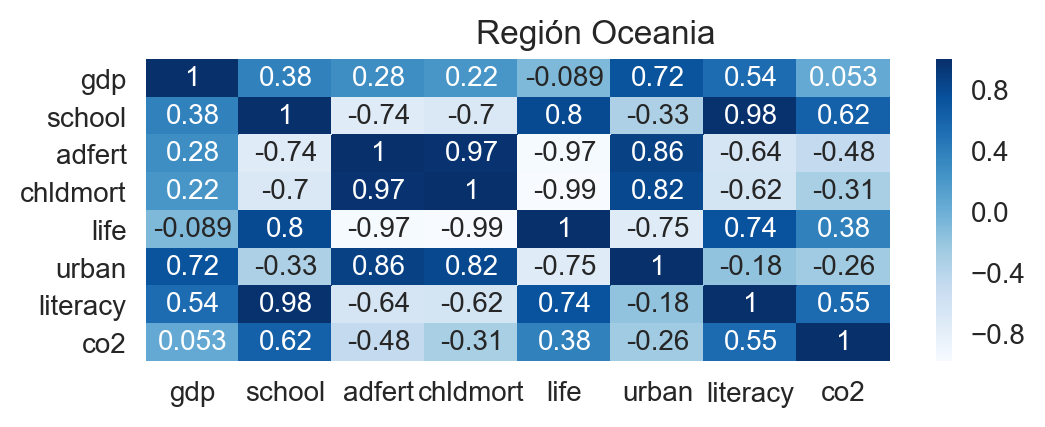

In [142]:
df_sub = df.loc[:, ['gdp', 'school', 'adfert', 'chldmort', 'life', 'urban', 'literacy', 'co2', 'region']]
for r in pd.unique(df['region']):
    tmp = df_sub[df_sub['region'] == r].dropna()
    working_subset = tmp.loc[:, ['gdp', 'school', 'adfert', 'chldmort', 'life', 'urban', 'literacy', 'co2']]
    corr = working_subset.corr()
    plt.figure(figsize=(6, 2))
    sns.heatmap(corr, cmap='Blues', annot=True)
    plt.suptitle("Región {}".format(r))

### La correlación entre el promedio de años de escolaridad y la tasa de alfabetismo es alta en todas las regiones menos en Europa

### Bonus Points: Grafique los diagramas de dispersión para los principales hallazgos.